# Support Vector Machine Trail 1
   ## Cleaning data 
      1. Dealing with a missing data by the following
           Filled in some missing values 
           Dropped some few missing values
      2. Dealing with categorical features by the following
           Creating a dummy variables
      
   ## Modeling 
      1. Split the data into training and testing
      2. Train the SVM model --> it needs numeric features
      3. Confusion Matrix

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv("C:\\AllamMarwa\\3- Side Projects\\Side Project - titanic\\Data\\titanic_train.csv")

**1. Dealing with a missing data**

Imputation and removing the nulls

In [6]:
for i in train.Pclass.unique():
    if pd.isnull(train[train.Pclass==i]["Age"]).sum()!=0:
        train.Age.fillna(train[train.Pclass==i]["Age"].mean(),inplace=True)
    print (i)

3
1
2


In [7]:
def impute(train,Pclass):
    for i in train.Pclass.unique():
        if pd.isnull(train[train.Pclass==i]["Age"]).sum()!=0:
            train.Age.fillna(train[train.Pclass==i]["Age"].mean(),inplace=True)
            print (i)
    return train

In [8]:
train = impute(train, train.Pclass)

In [9]:
train.drop('Cabin',axis=1,inplace=True)

In [10]:
train.dropna(inplace = True)   #drop the null values in embarked columns

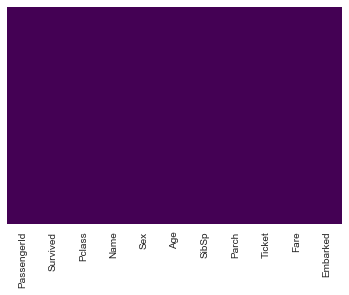

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

**2. Dealing with categorical features**

In [12]:
Sex = pd.get_dummies(train[['Sex']],drop_first = True)

In [13]:
Embarked = pd.get_dummies(train[['Embarked']], drop_first = True)

In [14]:
train = pd.concat([train, Sex, Embarked],axis = 1)

In [15]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1,inplace = True)

In [16]:
train.drop('PassengerId',axis = 1,inplace = True)

In [17]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


# **Building Support Vector Machines Model**

In [18]:
x = train.drop('Survived', axis=1)
y = train['Survived']

**1. Split the data into training and testing**

In [19]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=101)

In [21]:
len(X_train), len(X_validation)

(622, 267)

**2. Train the SVM model**

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
#clf = svm.SVC(gamma=0.001, C=100.)

In [24]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [26]:
predictions = svm_model.predict(X_validation)

**3. Confusion Matrix**

In [1]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve

In [27]:
print(confusion_matrix(y_validation,predictions))
print('\n')
print(classification_report(y_validation,predictions))

[[133  30]
 [ 58  46]]


             precision    recall  f1-score   support

          0       0.70      0.82      0.75       163
          1       0.61      0.44      0.51       104

avg / total       0.66      0.67      0.66       267



In [30]:
precision, recall, _ = precision_recall_curve(y_validation, predictions)

In [31]:
precision

array([ 0.38951311,  0.60526316,  1.        ])

In [38]:
recall

array([ 1.        ,  0.44230769,  0.        ])

In [36]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_validation,predictions)

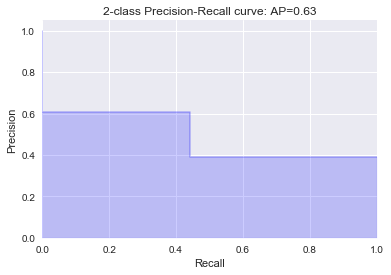

In [37]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))